In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
Juni_1_df = pd.read_csv('TB_Juni_1.csv')
Juni_2_df = pd.read_csv('TB_Juni_2.csv')
Juni_3_df = pd.read_csv('TB_Juni_3.csv')
Juli_1_df = pd.read_csv('TB_Juli_1.csv')
Juli_2_df = pd.read_csv('TB_Juli_2.csv')
Juli_3_df = pd.read_csv('TB_Juli_3.csv')
August_1_df = pd.read_csv('TB_August_1.csv')
August_2_df = pd.read_csv('TB_August_2.csv')
August_3_df = pd.read_csv('TB_August_3.csv')

TB_df = pd.concat([Juni_1_df,Juni_2_df,Juni_3_df,Juli_1_df,Juli_2_df,Juli_3_df,August_1_df,August_2_df,August_3_df],axis=0,ignore_index=True)


TB_df.set_index('Timestamp',inplace=True)
TB_df.sort_index(inplace=True)

In [21]:
UT_df = pd.read_csv('UT_df.csv',index_col='Timestamp').sort_index()

In [22]:
UT_df.rename(columns={'M1-Druck':'UL_T1_p','M1-LA':'UL_T1_LA','M2-Druck':'UL_T2_p','M2-LA':'UL_T2_LA'},inplace=True)
TB_df.rename(columns={'M1-Druck':'OL_T1_p','M1-LA':'OL_T1_LA','M2-Druck':'OL_T2_p','M2-LA':'OL_T2_LA'},inplace=True)

In [23]:
validation_df = TB_df.join(UT_df,how='outer')

In [24]:
t_vec = validation_df.index.to_numpy()
TB_M1_p = validation_df['OL_T1_p'].to_numpy()
TB_M2_p = validation_df['OL_T2_p'].to_numpy()
TB_M1_LA = validation_df['OL_T1_LA'].to_numpy()
TB_M2_LA = validation_df['OL_T2_LA'].to_numpy()
TB_level = validation_df['TB-Pegel'].to_numpy()

UT_M1_p = validation_df['UL_T1_p'].to_numpy()
UT_M2_p = validation_df['UL_T2_p'].to_numpy()
UT_M1_LA = validation_df['UL_T1_LA'].to_numpy()
UT_M2_LA = validation_df['UL_T2_LA'].to_numpy()

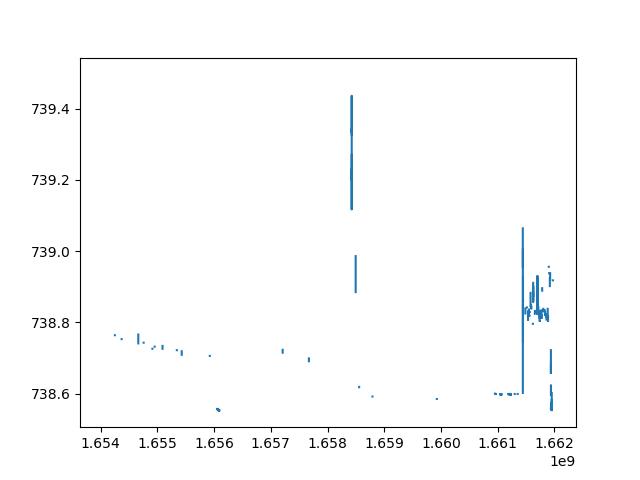

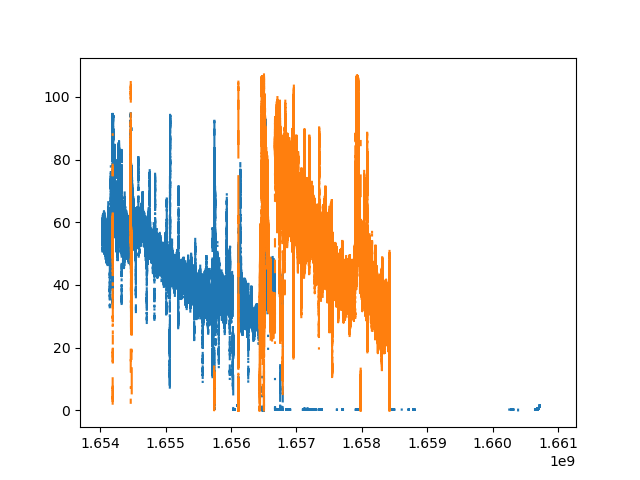

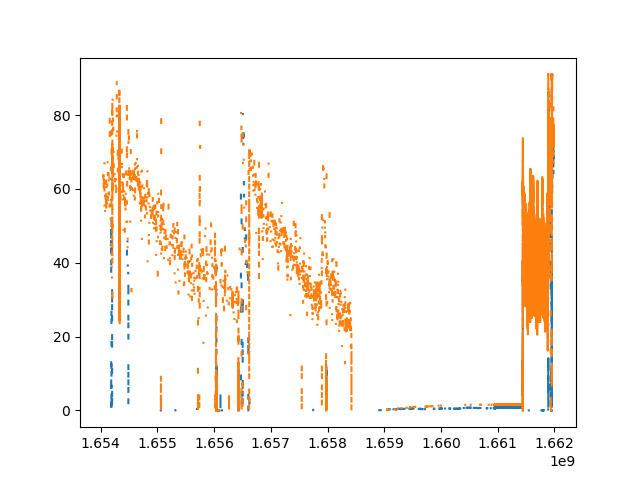

In [25]:
%matplotlib widget
fig1 = plt.figure()
plt.plot(t_vec,TB_level)

fig2 = plt.figure()
plt.plot(t_vec,TB_M1_LA)
plt.plot(t_vec,TB_M2_LA)

fig3 = plt.figure()
plt.plot(t_vec,UT_M1_LA)
plt.plot(t_vec,UT_M2_LA)
